# 5조 chatYCK 나 뭐먹고 살지 알려줘
---

In [ ]:
!pip install konlpy # 자연어 처리
!pip install koreanize-matplotlib # 한글차트 깨짐 방지
!pip install wordcloud # 텍스트를 가장 많은 순으로 크게 보여줌

In [4]:
from PIL import Image # 이미지 불러오는 라이브러리
import numpy as np
from wordcloud import ImageColorGenerator

import pandas as pd
import re # 키워드 쓸때 사용

import konlpy

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import plotly.express as px

In [ ]:
from pickle import encode_long
columns = []
df = pd.read_csv('/content/졸업생의 취업 현황 (과별)_2023-04-25162321489 (1).csv')
df.head(15)


,기준연도,학교종류,설립구분,지역,상태,학교명,단과대학,학과(전공),구분,학과특성,남자 졸업자,여자 졸업자,취업률(%)\n[B/{A-(C+D+E+F+G)x100
0,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,간호학과,주간,일반과정,15,144,82.2
1,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,경찰행정학과,주간,일반과정,7,12,52.6
2,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,귀금속주얼리학과,주간,일반과정,3,12,83.3
3,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,물리치료학과,주간,일반과정,20,25,83.7
4,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,방사선학과,주간,일반과정,19,17,82.9
5,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,사회복지재활학부,주간,일반과정,37,46,68.8
6,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,안경광학과,주간,일반과정,12,13,75.0
7,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,외식조리영양학부,주간,일반과정,9,10,57.9
8,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,유아교육과,주간,일반과정,1,29,63.3
9,2021,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,작업치료학과,주간,일반과정,8,21,86.2


In [ ]:
# 남,여를 합친 총 졸업생 컬럼 생성
df['남자 졸업자'] = df['남자 졸업자'].astype('int')
df['여자 졸업자'] = df['여자 졸업자'].astype('int')
df['총 졸업생 수'] = df['남자 졸업자'] + df['여자 졸업자']

# 학과를 그룹으로 해서 취업률의 전체 점수의 평균을 내림차순으로 정렬
df_group = df.groupby(['학과(전공)','총 졸업생 수'],as_index=False).agg(취업률 = ('취업률(%)\n[B/{A-(C+D+E+F+G)x100','mean')).sort_values('취업률',ascending=False)

# 취업률 int형으로 변환
df_group['취업률'] = df_group['취업률'].astype('float')

# 과의 합격률이 100이거나 0인 과 제외
df_group = df_group.loc[(df_group['총 졸업생 수'] >= 30)]
df_group

,학과(전공),총 졸업생 수,취업률
8121,한의학과,54,100.0
8120,한의학과,52,100.0
1501,군사학과,48,100.0
1500,군사학과,47,100.0
1497,군사학과,36,100.0
...,...,...,...
3230,불교학부,40,0.0
4762,신학부,37,0.0
4756,신학과,96,0.0
3229,불교학부,37,0.0


In [ ]:
# 총 졸업생 수와 취업률의 합, 평균 구하기
df_group_unique = df_group.groupby('학과(전공)',as_index=False)[['총 졸업생 수','취업률']].agg(['sum','mean'])
df_group_unique.to_csv('전처리3차.csv')

In [ ]:
df_group_unique.reset_index()

학과(전공) 총 졸업생 수                취업률      
                                         sum        mean    sum  mean
0                          BT융합제약공학과      74   74.000000   66.2  66.2
1                     DU인재법학부(공법학전공)      56   56.000000   49.1  49.1
2                             EICC학과      55   55.000000   65.0  65.0
3                        G2(영·중)융합학부      32   32.000000   58.1  58.1
4     Global Business & Technology전공      30   30.000000   57.7  57.7
...                              ...     ...         ...    ...   ...
1828                        회화ㆍ디자인학부      42   42.000000   65.9  65.9
1829                             회화과     154   51.333333  178.5  59.5
1830                            회화전공     124   41.333333  190.2  63.4
1831                         휴먼건축공학부      56   56.000000   70.8  70.8
1832                         휴먼서비스학부     121  121.000000   53.8  53.8

[1833 rows x 5 columns]

In [ ]:
# 새로운 컬럼 및 데이터 입력
df_group_final = {'학과(전공)':df_group_unique.index,
                  '총 졸업생 수' : df_group_unique['총 졸업생 수']['sum'],
                  '취업률' : df_group_unique['취업률']['mean']}

df_group_final

{'학과(전공)': Index(['BT융합제약공학과', 'DU인재법학부(공법학전공)', 'EICC학과', 'G2(영·중)융합학부',
        'Global Business & Technology전공', 'Hospitality경영학부',
        'ICT융합학부(멀티미디어공학전공)', 'ICT융합학부(인공지능전공)', 'ICT융합학부(정보통신공학전공)', 'ICT창업학부',
        ...
        '회계세무학과', '회계재무학전공', '회계학과', '회계학전공', '회화', '회화ㆍ디자인학부', '회화과', '회화전공',
        '휴먼건축공학부', '휴먼서비스학부'],
       dtype='object', name='학과(전공)', length=1833),
 '총 졸업생 수': 학과(전공)
 BT융합제약공학과                          74
 DU인재법학부(공법학전공)                     56
 EICC학과                             55
 G2(영·중)융합학부                        32
 Global Business & Technology전공     30
                                  ... 
 회화ㆍ디자인학부                           42
 회화과                               154
 회화전공                              124
 휴먼건축공학부                            56
 휴먼서비스학부                           121
 Name: sum, Length: 1833, dtype: int64,
 '취업률': 학과(전공)
 BT융합제약공학과                         66.2
 DU인재법학부(공법학전공)                    49.1
 EICC학과                    

In [ ]:
df_group_unique.index

Index(['BT융합제약공학과', 'DU인재법학부(공법학전공)', 'EICC학과', 'G2(영·중)융합학부',
       'Global Business & Technology전공', 'Hospitality경영학부',
       'ICT융합학부(멀티미디어공학전공)', 'ICT융합학부(인공지능전공)', 'ICT융합학부(정보통신공학전공)', 'ICT창업학부',
       ...
       '회계세무학과', '회계재무학전공', '회계학과', '회계학전공', '회화', '회화ㆍ디자인학부', '회화과', '회화전공',
       '휴먼건축공학부', '휴먼서비스학부'],
      dtype='object', name='학과(전공)', length=1833)

In [ ]:
# 데이터 프레임으로 변환
df_group_final = pd.DataFrame(df_group_final,index=df_group_final['학과(전공)'])
del df_group_final['학과(전공)']
df_group_final.reset_index()
df_group_final

,총 졸업생 수,취업률
학과(전공),,
BT융합제약공학과,74,66.2
DU인재법학부(공법학전공),56,49.1
EICC학과,55,65.0
G2(영·중)융합학부,32,58.1
Global Business & Technology전공,30,57.7
...,...,...
회화ㆍ디자인학부,42,65.9
회화과,154,59.5
회화전공,124,63.4


In [ ]:
df_group_final.reset_index()
df_group_final

,총 졸업생 수,취업률
학과(전공),,
BT융합제약공학과,74,66.2
DU인재법학부(공법학전공),56,49.1
EICC학과,55,65.0
G2(영·중)융합학부,32,58.1
Global Business & Technology전공,30,57.7
...,...,...
회화ㆍ디자인학부,42,65.9
회화과,154,59.5
회화전공,124,63.4


In [ ]:
df_group_final = df_group_final.sort_values(['총 졸업생 수','취업률'],ascending=False)
df_group_final

,총 졸업생 수,취업률
학과(전공),,
간호학과,6701,84.123380
경영학과,6452,61.512153
경영학부,4745,64.232759
컴퓨터공학과,2908,63.330702
전자공학과,2763,59.135937
...,...,...
토목도시공학부,30,41.400000
생명과학부 생물학전공,30,40.000000
과학교육학부(물리교육전공),30,35.700000


In [ ]:
df_group_final.to_excel('/content/과별_졸업자_취업률_전처리6차_찐최종.xlsx')

# 전처리 된 데이터를 이용하여 인기 상위 10개의 과의 취업률과 하위 10개의 과의 취업률 비교  
1. 모든 데이터는 졸업자 30명 이상을 기준으로 함
2. 사람들이 많이 가는 과와 가지 않는 과의 취업률 비교
3. 취업률이 가장 낮은 과 10개와 높은 과 10개 비교
4. 종교와 관련된 과가 전부 취업률이 0%인 이유
 - 교회는 대부분 건강보험에 가입하지 않는다”며 “신학대에 진학하는 대부분의 학생들은 교회 사역을 목적으로 한다. 따라서 졸업 후 자신이 원하는 교회 일을 하더라도 대학정보공시제도의 취업률 기준에 따르면 그들은 모두 실업자인 셈

# 위의 주제와 비슷하나 전공,과,부 를 합침
1. 모든 데이터는 졸업자 30명 이상을 기준으로 함
2. 사람들이 많이 가는 과와 가지 않는 과의 취업률 비교
3. 취업률이 가장 낮은 과 10개와 높은 과 10개 비교
4. 종교와 관련된 과가 전부 취업률이 0%인 이유
 - 교회는 대부분 건강보험에 가입하지 않는다”며 “신학대에 진학하는 대부분의 학생들은 교회 사역을 목적으로 한다. 따라서 졸업 후 자신이 원하는 교회 일을 하더라도 대학정보공시제도의 취업률 기준에 따르면 그들은 모두 실업자인 셈

In [ ]:
df = pd.read_excel('/content/과별_졸업자_취업률_전처리6차_찐최종.xlsx')
df['학과(전공)'] = df['학과(전공)'].str.split('(').str.get(0).str.split(' ').str.get(0)
df['학과(전공)'] = df['학과(전공)'].astype('str')
df

,학과(전공),총 졸업생 수,취업률
0,간호학과,6701,84.123380
1,경영학과,6452,61.512153
2,경영학부,4745,64.232759
3,컴퓨터공학과,2908,63.330702
4,전자공학과,2763,59.135937
...,...,...,...
1828,토목도시공학부,30,41.400000
1829,생명과학부,30,40.000000
1830,과학교육학부,30,35.700000
1831,생태환경관광학부,30,34.500000


In [ ]:
for i in df.index:
  if '과' in df.loc[i,'학과(전공)']:
    df.loc[i,'전공'] = df.loc[i,'학과(전공)'].split('과')[0]
  elif '학부' in df.loc[i,'학과(전공)']:
    df.loc[i,'전공'] = df.loc[i,'학과(전공)'].split('부')[0]
  elif '전공' in df.loc[i,'학과(전공)']:
    df.loc[i,'전공'] = df.loc[i,'학과(전공)'].split('전공')[0]
df

,학과(전공),총 졸업생 수,취업률,전공
0,간호학과,6701,84.123380,간호학
1,경영학과,6452,61.512153,경영학
2,경영학부,4745,64.232759,경영학
3,컴퓨터공학과,2908,63.330702,컴퓨터공학
4,전자공학과,2763,59.135937,전자공학
...,...,...,...,...
1828,토목도시공학부,30,41.400000,토목도시공학
1829,생명과학부,30,40.000000,생명
1830,과학교육학부,30,35.700000,
1831,생태환경관광학부,30,34.500000,생태환경관광학


In [ ]:
chi_df = df.groupby('전공')['취업률'].mean()
com_df = df.groupby('전공')['총 졸업생 수'].sum()

In [ ]:
chi_df = pd.DataFrame(chi_df)
com_df = pd.DataFrame(com_df)
chi_df.reset_index(inplace=True)
com_df.reset_index(inplace=True)

In [ ]:
df_perpect = pd.merge(chi_df,com_df)
df_perpect

,전공,취업률,총 졸업생 수
0,,45.400000,330
1,BT융합제약공학,66.200000,74
2,DU인재법학,49.100000,56
3,EICC학,65.000000,55
4,Hospitality경영학,66.500000,310
...,...,...,...
1327,회계학,53.250275,1192
1328,회화,61.450000,278
1329,회화ㆍ디자인학,65.900000,42
1330,휴먼건축공학,70.800000,56


In [ ]:
df_perpect.sort_values('총 졸업생 수',inplace=True,ascending=False)
df_perpect

,전공,취업률,총 졸업생 수
59,경영학,67.036491,16364
31,간호학,81.612230,7223
233,기계공학,66.023031,5585
1142,컴퓨터공학,66.769700,4607
979,전자공학,61.490451,4562
...,...,...,...
1304,환경교육,27.600000,30
544,산업스포츠학,100.000000,30
1170,트랜스아트,50.000000,30
101,공연엔터테인먼트학,87.000000,30


In [ ]:
df_perpect.to_excel('전공별_졸업자_취업률_졸업생많은순서.xlsx',index=False)

In [ ]:
df_perpect.sort_values('총 졸업생 수',ascending=False, inplace=True)
df_perpect

,전공,취업률,총 졸업생 수
59,경영학,67.036491,16364
31,간호학,81.612230,7223
233,기계공학,66.023031,5585
1142,컴퓨터공학,66.769700,4607
979,전자공학,61.490451,4562
...,...,...,...
106,공연예술학,67.900000,30
147,국어국문창작학,44.400000,30
170,국제스포츠레저,78.600000,30
421,미디어영상연기학,57.100000,30


In [ ]:
df_perpect.to_excel('전공별_졸업자_취업률_취업률높은순서.xlsx',index=False)

# 1) 과별 인기순 취업률 시각화

## 1-1 인기도 상위 top10 과의 학생 수 및 취업률

In [ ]:
df = pd.read_excel('/content/과별_졸업자_취업률_전처리6차_찐최종.xlsx')
df['취업률'] = df['취업률'].astype('int')
df_top10 = df.head(10)
df_top10

,학과(전공),총 졸업생 수,취업률
0,간호학과,6701,84
1,경영학과,6452,61
2,경영학부,4745,64
3,컴퓨터공학과,2908,63
4,전자공학과,2763,59
5,경영학전공,2573,61
6,기계공학과,2508,63
7,의학과,2313,94
8,사회복지학과,2210,56
9,경제학과,2117,59


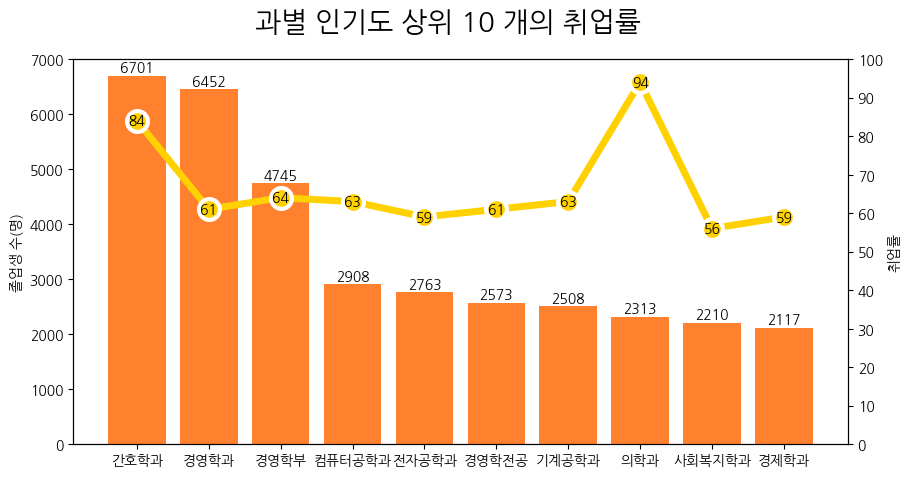

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,5)) # 기본 (1,1)
fig.suptitle('과별 인기도 상위 10 개의 취업률', size= 20)
ax1.set_ylabel('졸업생 수(명)')
ax1.set_ylim(0,7000)
ax1.set_yticks([0,1000,2000,3000,4000,5000,6000,7000])
ax1.bar(df_top10['학과(전공)'], df_top10['총 졸업생 수'], color='#ff812d')
for idx,val in enumerate(df_top10['총 졸업생 수']): # enumerate() - 인덱스와 원소를 반복해서 준다.
  ax1.text(idx,val +80, val, ha='center') # text(가로,세로,텍스트) 함수로 x축을 인덱스 번호로 y축을 출생아 수의 값으로 하여 출생아 수의 값을 적는다. ha='정렬할 자리'



ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel('취업률')
ax2.set_ylim(0,100)
ax2.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
# markeredgecolor = mec (마커 테두리 색깔) / markeredgewidth = mew (마커 테두리 두께) / markersize = ms (마커 크기) / linewidth = lw (라인 두께) / linestyle = ls (라인 스타일)
ax2.plot(df_top10['학과(전공)'], df_top10['취업률'], color='#ffd100', marker='o', markersize=15, linewidth=5, markeredgecolor='w', markeredgewidth = 3)
for idx, val in enumerate(df_top10['취업률']):
  ax2.text(idx, val-1, val, ha='center')

## 1-2 인기도 하위 top10 과의 학생 수 및 취업률

In [ ]:
df = pd.read_excel('/content/과별_졸업자_취업률_전처리6차_찐최종.xlsx')
df['취업률'] = df['취업률'].astype('int')
df_top10 = df.tail(10)
df_top10

,학과(전공),총 졸업생 수,취업률
1823,생명과학정보학부,30,44
1824,역사·문화콘텐츠학부,30,43
1825,글로벌한국어문화교육전공,30,42
1826,윤리교육과,30,42
1827,사회언론정보학부 사회학전공,30,42
1828,토목도시공학부,30,41
1829,생명과학부 생물학전공,30,40
1830,과학교육학부(물리교육전공),30,35
1831,생태환경관광학부(생태관광전공),30,34
1832,환경교육과,30,27


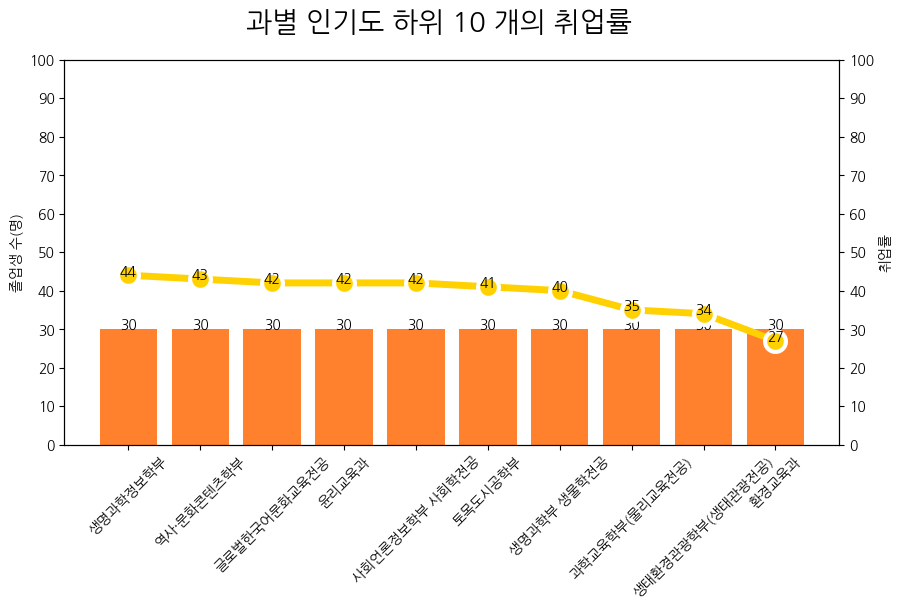

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,5)) # 기본 (1,1)
fig.suptitle('과별 인기도 하위 10 개의 취업률', size= 20)
ax1.set_ylabel('졸업생 수(명)')
ax1.set_ylim(0,100)
ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
ax1.bar(df_top10['학과(전공)'], df_top10['총 졸업생 수'], color='#ff812d')
for idx,val in enumerate(df_top10['총 졸업생 수']): # enumerate() - 인덱스와 원소를 반복해서 준다.
  ax1.text(idx,val, val, ha='center') # text(가로,세로,텍스트) 함수로 x축을 인덱스 번호로 y축을 출생아 수의 값으로 하여 출생아 수의 값을 적는다. ha='정렬할 자리'
plt.xticks(rotation=45)


ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel('취업률')
ax2.set_ylim(0,100)
ax2.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
# markeredgecolor = mec (마커 테두리 색깔) / markeredgewidth = mew (마커 테두리 두께) / markersize = ms (마커 크기) / linewidth = lw (라인 두께) / linestyle = ls (라인 스타일)
ax2.plot(df_top10['학과(전공)'], df_top10['취업률'], color='#ffd100', marker='o', markersize=15, linewidth=5, markeredgecolor='w', markeredgewidth = 3)
for idx, val in enumerate(df_top10['취업률']):
  ax2.text(idx, val, val, ha='center')

# 2) 전공 별 인기순 취업률 시각화

##2-1 인기도 상위 top10 전공의 학생 수 및 취업률

In [ ]:
df = pd.read_excel('/content/전공별_졸업자_취업률_졸업생많은순서.xlsx')
df['취업률'] = df['취업률'].astype('int')
df_top10 = df.head(10)
df_top10

,전공,취업률,총 졸업생 수
0,경영학,67,16364
1,간호학,81,7223
2,기계공학,66,5585
3,컴퓨터공학,66,4607
4,전자공학,61,4562
5,경제학,59,4252
6,사회복지학,57,3762
7,영어영문학,58,2801
8,행정학,52,2752
9,의학,95,2491


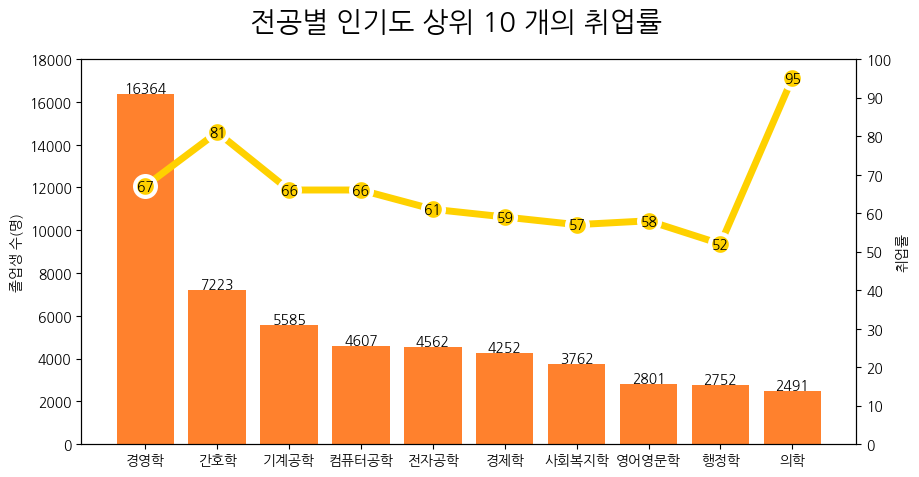

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,5)) # 기본 (1,1)
fig.suptitle('전공별 인기도 상위 10 개의 취업률', size= 20)
ax1.set_ylabel('졸업생 수(명)')
ax1.set_ylim(0,18000)
ax1.set_yticks([0,2000,4000,6000,8000,10000,12000,14000,16000,18000])
ax1.bar(df_top10['전공'], df_top10['총 졸업생 수'], color='#ff812d')
for idx,val in enumerate(df_top10['총 졸업생 수']): # enumerate() - 인덱스와 원소를 반복해서 준다.
  ax1.text(idx,val +80, val, ha='center') # text(가로,세로,텍스트) 함수로 x축을 인덱스 번호로 y축을 출생아 수의 값으로 하여 출생아 수의 값을 적는다. ha='정렬할 자리'



ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel('취업률')
ax2.set_ylim(0,100)
ax2.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
# markeredgecolor = mec (마커 테두리 색깔) / markeredgewidth = mew (마커 테두리 두께) / markersize = ms (마커 크기) / linewidth = lw (라인 두께) / linestyle = ls (라인 스타일)
ax2.plot(df_top10['전공'], df_top10['취업률'], color='#ffd100', marker='o', markersize=15, linewidth=5, markeredgecolor='w', markeredgewidth = 3)
for idx, val in enumerate(df_top10['취업률']):
  ax2.text(idx, val-1, val, ha='center')

## 2-2 인기도 하위 top10 전공의 학생 수 및 취업률

In [ ]:
df = pd.read_excel('/content/전공별_졸업자_취업률_졸업생많은순서.xlsx')
df['취업률'] = df['취업률'].astype('int')
df_top10 = df.tail(20)
df_top10

,전공,취업률,총 졸업생 수
1312,운동건강관리,63,30
1313,융합보안공학,81,30
1314,TV・영화학,65,30
1315,목재・종이,63,30
1316,한방제약개발학,46,30
1317,미디어영상연기학,57,30
1318,산업보건학,63,30
1319,프랑스언어문화학,63,30
1320,동물생명자원,61,30
1321,뮤지컬,55,30


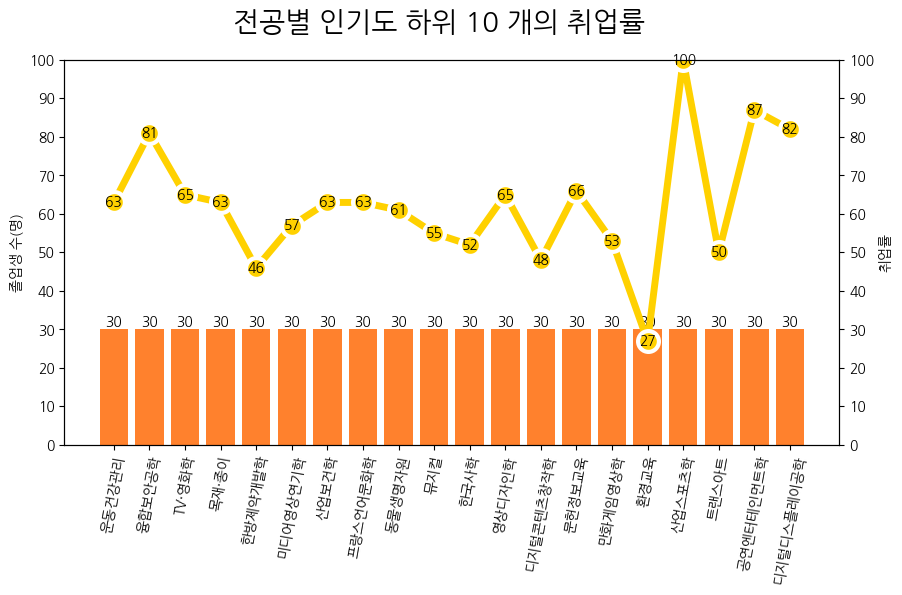

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,5)) # 기본 (1,1)
fig.suptitle('전공별 인기도 하위 10 개의 취업률', size= 20)
ax1.set_ylabel('졸업생 수(명)')
ax1.set_ylim(0,100)
ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
ax1.bar(df_top10['전공'], df_top10['총 졸업생 수'], color='#ff812d')
for idx,val in enumerate(df_top10['총 졸업생 수']): # enumerate() - 인덱스와 원소를 반복해서 준다.
  ax1.text(idx,val +1, val, ha='center') # text(가로,세로,텍스트) 함수로 x축을 인덱스 번호로 y축을 출생아 수의 값으로 하여 출생아 수의 값을 적는다. ha='정렬할 자리'
plt.xticks(rotation=80)


ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel('취업률')
ax2.set_ylim(0,100)
ax2.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
# markeredgecolor = mec (마커 테두리 색깔) / markeredgewidth = mew (마커 테두리 두께) / markersize = ms (마커 크기) / linewidth = lw (라인 두께) / linestyle = ls (라인 스타일)
ax2.plot(df_top10['전공'], df_top10['취업률'], color='#ffd100', marker='o', markersize=15, linewidth=5, markeredgecolor='w', markeredgewidth = 3)
for idx, val in enumerate(df_top10['취업률']):
  ax2.text(idx, val-1, val, ha='center')

# 20~29세의 경제활동 인구 조사

In [ ]:
df_working = pd.read_csv('/content/연령별_경제활동인구_총괄_20230426145537.csv',encoding='EUC-kr')
df_working = df_working.T
df_working

,0,1
연령계층별,연령계층별,20 - 29세
2018,인구 (천명),6390
2018.1,경제활동인구 (천명),4086
2018.2,비경제활동인구 (천명),2303
2019,인구 (천명),6443
2019.1,경제활동인구 (천명),4114
2019.2,비경제활동인구 (천명),2328
2020,인구 (천명),6459
2020.1,경제활동인구 (천명),3955
2020.2,비경제활동인구 (천명),2503


In [ ]:
df_working_pie = {'2018년도':[2303/6390*100,100-2303/6390*100],
                  '2019년도':[2328/6443*100,100-2328/6443*100],
                  '2020년도':[2503/6459*100,100-2503/6459*100],
                  '2021년도':[2443/6458*100,100-2443/6458*100],
                  '2022년도':[2245/6323*100,100-2245/6323*100],
                  '총':100}
df_working_pie = pd.DataFrame(df_working_pie,index=['청년 미취업률','청년 취업률'])
df_working_pie.reset_index(inplace=True)
df_working_pie

,index,2018년도,2019년도,2020년도,2021년도,2022년도,총
0,청년 미취업률,36.040689,36.132237,38.752129,37.829049,35.505298,100
1,청년 취업률,63.959311,63.867763,61.247871,62.170951,64.494702,100


In [ ]:
names = ['합격률']
fig = px.pie(df_working_pie, names='index', values='2018년도')
fig.update_traces(textposition = 'inside', # 범례를 파이차트 안으로 넣기
                 textinfo = 'percent+label') # 
fig.show()

In [16]:
df = pd.read_csv('/content/청년이_선호하는_직장__1334세_인구__20230426144851.csv', encoding='EUC-kr')
df = df.T.iloc[4:]
df

,0
국가기관,21.8
공기업,23.3
대기업,18.5
중소기업,4.4
벤처기업,2.5
외국계기업,4.2
전문직기업,5.5
해외취업,2.4
자영업(창업 등),16.1
기타,1.4


In [36]:
fig = px.pie(df, names=df.index, values=0)
fig.update_traces(textposition = 'inside', # 범례를 파이차트 안으로 넣기
                 textinfo = 'percent+label',
                  textfont_size=20,
                  pull = [0,0,0,0.2,0,0,0,0,0,0]) # 
fig.show()

# 나이대별 2011년~2022년도 취업률

In [52]:
df = pd.read_excel('/content/421201_20230427165946773_excel.xlsx')
df = df.T
df.columns = df.iloc[0]
df  = df.drop(index='나이')
df

나이,20-29세,30-39세,40-49세,50-59세
2011,58.4,72.2,78.4,71.6
2012,58.2,72.8,78.3,72.3
2013,56.8,73.3,78.4,73.2
2014,57.4,74.1,79.1,74.2
2015,57.9,74.4,79.1,74.4
2016,58.2,74.7,79.3,74.3
2017,57.6,75.3,79.4,75.3
2018,57.9,75.7,79.0,75.2
2019,58.2,76.0,78.4,75.4
2020,55.7,75.3,77.1,74.3


In [76]:
import plotly.graph_objects as go
import numpy as np

title = '연도별 청년 고용률'
labels = ['20~29세', '30~39세', '40~49세', '50~59세']
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

x_data = np.vstack((np.arange(2010, 2022),)*4)

y_data = np.array([
    [58.4,58.2,56.8,57.4,57.9,58.2,57.6,57.9,58.2,55.7,57.4,60.4],
    [72.2,72.8,73.3,74.1,74.4,74.7,75.3,75.7,74.0,75.3,75.3,77.3],
    [78.4,78.3,78.4,79.1,79.1,79.3,79.4,79.0,78.4,77.1,77.3,78.1],
    [71.6,72.3,73.2,74.2,74.4,74.3,75.3,75.2,75.4,74.3,75.1,77.1],
])

fig = go.Figure()

for i in range(0, 4):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    
    fig.add_trace(go.Scatter(
        x=[x_data[i][0], x_data[i][-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# 레이블 추가
for y_trace, label, color in zip(y_data, labels, colors):
    # 왼쪽 레이블
    if label == '50~59세': # 글자가 겹쳐서 하나의 컬럼만 이름 내리기기
      annotations.append(dict(xref='paper', x=0.05, y=y_trace[0]-1,
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
      # 오른쪽 레이블
      annotations.append(dict(xref='paper', x=0.95, y=y_trace[11]-1,
                                    xanchor='left', yanchor='middle',
                                    text='{}%'.format(y_trace[11]),
                                    font=dict(family='Arial',
                                              size=16),
                                    showarrow=False))
      continue
    # 왼쪽 레이블
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    # 오른쪽 레이블
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[11],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(y_trace[11]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
# 타이틀
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='2011~2022년도 연령별 고용률',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# 소스 첨부
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: 국가 지표 체계 ' +
                                   '전 연령 고용률 데이터',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()